# Project Description
The dataset, [No Show Appointments](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&source=editors&ust=1612999158075000&usg=AOvVaw3hth8Gx6RgaZgZ_PeommvL) with further explanation on [Kaggle](https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&source=editors&ust=1612999158076000&usg=AOvVaw0s7Xdg12uAs7KnQAjYTXxo) is a collection of information about patients appointments in Brazil with focus on keeping to the appointments by the patients.
### Question
Using the data, we need to determine the important factors that can help in predicting if a patient will show up for their scheduled appointment.
### Steps
    1.Import the necessary libraries and load dataset
    2.Get basic information about the dataset.
    3.Clean the dataset
        i.Correct the datatype for the necessary columns.
        ii.Rename columns if necessary
        iii.Drop rows that are not relevant to the analysis.
    4.Analyse and use visualizations to answer the project questions.

### Import the necessary libraries

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the dataset

In [178]:
df = pd.read_csv('appointments.csv')

#### Basic information of the dataset 

In [179]:
# Preview the first five rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [180]:
# Preview the last five rows
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [181]:
#Check the size the dataset
df.shape

(110527, 14)

From above, it can be seen that the dataset is made of 110527 rows and 14 columns.

In [182]:
# Get Information about the dataset and its columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the information above, it can be seen that:

    i. there is no missing values in any of the columns since each of the has exactly 110527 rows with non-null values;
    ii. of the 14 columns, 8 are integers, 1 is float and five are objects.

### Clean the Dataset
    i.Correct the datatype for the necessary columns.
    ii.Rename columns if necessary
    iii.Check for duplicated rows
    iv.Drop rows that are not relevant to the analysis.

In [183]:
# get the datatype of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

##### Observations

    i.PatientID is float. Convert to int.
    ii.ScheduleDay and Appointmentday are objects. Converts to datetime.
    iii. Some of the column names are wrong while other are inconsistent. We will correct wrong column names and then change SMS_received and No-show for naming consistency with others.
    iv.All the appointment days have 00:00:00 timestamp. That will be ignored. Only the dates will be needed. Similarly, the time part of the ScheduledDay will be ignored.

In [184]:
#Convert PatientID to int
df.PatientId = df.PatientId.astype('int64')

In [185]:
#Convert ScheduleDay and AppointmentDay to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
print(df.AppointmentDay.dtypes)
print(df.ScheduledDay.dtypes)
print(df[['ScheduledDay', 'AppointmentDay']].head(1))

datetime64[ns, UTC]
datetime64[ns, UTC]
               ScheduledDay            AppointmentDay
0 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00


In [186]:
#confirm that the data types has been changed
df.dtypes

PatientId                       int64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

Use `dt.date` attribute to get rid of the time portion

In [187]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
print(df[['ScheduledDay', 'AppointmentDay']].head(2))

  ScheduledDay AppointmentDay
0   2016-04-29     2016-04-29
1   2016-04-29     2016-04-29


In [188]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Rename some of the columns

In [189]:
#List of the columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [190]:
#Rename some columns
df.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap', 'SMS_received':'SMSReceived', 'No-show':'NoShow'}, inplace = True)

In [191]:
#Confirm the renaming
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow'],
      dtype='object')

Check for duplicate rows

In [192]:
df.duplicated().sum()

0

There is no duplicate rows in the dataset

In [193]:
#Summarise the Dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From above, we can see that the minimum age is -1 which is not possible. To check it further, let's use `df.query()` to get more details about the rows with an invalid age:

In [194]:
df.query("Age == -1").shape[0]

1

From above, it can be seen that only one person has a negative age. For more details:

In [195]:
df.query("Age == -1")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


Since Age camnnot be negative, the row can be dropped. We will use the index number to reference it

In [196]:
df.drop(df.index[99832], inplace = True)

In [197]:
# Get the new size of the dataset after dropping the row with an invalid age
df.shape

(110526, 14)

There are now 110526 rows in the dataset.

In [198]:
# Summarise dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Let's copy the dataset into a new variable

In [199]:
newDF = df.copy()
newDF.shape

(110526, 14)

In [200]:
newDF.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Create new columns for the months, week days (`AppWeekDay`) and waiting time (`NumDays`) of the appointments. This will help understand the number of appointments per month and day of the week.

In [201]:
newDF['Month'] = pd.DatetimeIndex(newDF['AppointmentDay']).month
newDF['AppWeekDay'] = pd.to_datetime(newDF['AppointmentDay']).dt.day_name()
newDF['NumDays'] = (newDF['AppointmentDay'] - newDF['ScheduledDay']).dt.days

In [202]:
newDF.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,Month,AppWeekDay,NumDays
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,Friday,0


In [203]:
#Check months the appointments were made
newDF.Month.unique()

array([4, 5, 6])

Here, the appointments spans a period of three months, between April (4) and June(6)

In [204]:
#Check the days of the week the appointments were made
newDF.AppWeekDay.unique()

array(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday'],
      dtype=object)

The appointments spanned from Monday through Saturday. No appointments on Sundays.

In [205]:
#Check the various number of days between the date of scheduling and the date of the appointment
newDF.NumDays.unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123])

From above, it can be seen that some of the values were negative, meaning that appointment days were before the days the appointments were scheduled, which is wrong. To verify further:

In [206]:
# Number of days with invalid waiting period
len(newDF.query("NumDays < 0"))

5

In [207]:
# More details of the patients with invalid waiting period
newDF.query("NumDays < 0")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,Month,AppWeekDay,NumDays
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,5,Monday,-1
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,5,Tuesday,-1
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,5,Wednesday,-1
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,5,Thursday,-6
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,5,Tuesday,-1


Since this rows have invalid waiting periods, they can be dropped

In [208]:
newDF.drop(newDF.index[[27033, 55226, 64175, 71533, 72362]], inplace = True)

In [209]:
#Confirm that the rows have been dropped
len(newDF.query("NumDays < 0"))

0

In [210]:
newDF.shape

(110521, 17)

## Analysis

In [211]:
newDF.NoShow.value_counts()

No     88207
Yes    22314
Name: NoShow, dtype: int64

In [212]:
perNo = (len(newDF.query("NoShow == 'No'")) / newDF.shape[0]) * 100
perYes = (len(newDF.query("NoShow == 'Yes'")) / newDF.shape[0]) * 100
perNo, perYes

(79.81017182254956, 20.18982817745044)

From above, it can be seen that 88207 (about 80%) of the patients showed up for their appointments while 22314 (20%) did not.

### Appointments based on Gender

In [213]:
#Number that showed or did not show for appointments based on Gender
newDF.groupby('Gender')['NoShow'].value_counts()

Gender  NoShow
F       No        57245
        Yes       14591
M       No        30962
        Yes        7723
Name: NoShow, dtype: int64

In [214]:
per_F = (len(newDF.query("Gender == 'F'")) / newDF.shape[0]) * 100
per_M = (len(newDF.query("Gender == 'M'")) / newDF.shape[0]) * 100
per_F, per_M

(64.99760226563278, 35.00239773436722)

From above we can see that:

    i. 71839 or about 65% of the women booked for the appointment
    ii 38687 or about 35% of men booked for the apppointment

Next, define a function that can be used in doing some of the plots

In [215]:
def defGraphs(id_1, id_2, xParam, yParam, xLabel, yLabel, graphName):
    plt.bar([id_1, id_2], [xParam, yParam])
    plt.title(graphName)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()

Using the `defGraph` function defined above, we plot percentage of men and women that booked for the appointments

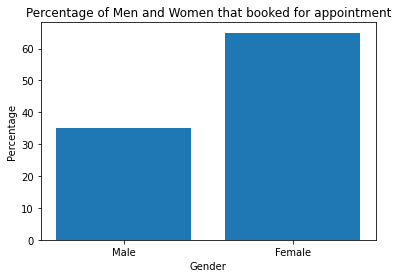

In [216]:
defGraphs(id_1 = 'Male', id_2 = 'Female', xLabel = 'Gender', yLabel = 'Percentage', xParam = per_M, yParam = per_F, 
          graphName = 'Percentage of Men and Women that booked for appointment')

Next, we find the proportion of men and women who showed up with respect to the individual total that booked for the appointments.

In [217]:
prop_F = len(newDF.query("Gender == 'F' & NoShow == 'No'")) / len(newDF.query("Gender == 'F'"))
prop_M = len(newDF.query("Gender == 'M' & NoShow == 'No'")) / len(newDF.query("Gender == 'M'"))
prop_F, prop_M

(0.7968845704103792, 0.800361897376244)

Plotting the graph of proportion of gender that showed up for the appointment

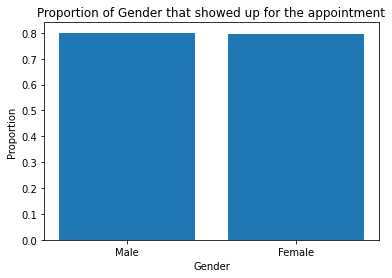

In [218]:
defGraphs(id_1 = 'Male', id_2 = 'Female', xLabel = 'Gender', yLabel = 'Proportion', xParam = prop_M, yParam = prop_F, 
          graphName = 'Proportion of Gender that showed up for the appointment')

From the above, it can be seen that the proportion of both Male and Female showing up for the appointment are almost the same. In essence, we can for now, say that their is no relationship between gender and a patient missing his/her appointment

### Appointments based on Hypertension

In [219]:
hyp_abs = len(newDF[newDF[('Hypertension')] == 0])
hyp_pre = len(newDF[newDF[('Hypertension')] == 1])
hyp_abs, hyp_pre

(88720, 21801)

In [220]:
hyp_abs_per = len(newDF[newDF[('Hypertension')] == 0]) / newDF.Hypertension.shape[0] * 100
hyp_pre_per = len(newDF[newDF[('Hypertension')] == 1]) / newDF.Hypertension.shape[0] * 100
hyp_abs_per, hyp_pre_per

(80.27433700382733, 19.725662996172673)

From above, it can be seen that 88725 (80.3%) of the patients are not hypertensive while 21801 (19.7%) are hypertensive.

Next we find the relationship between been hypertensive and showing up for the appointments by calculating the proportions

In [221]:
newDF.groupby('Hypertension')['NoShow'].value_counts()

Hypertension  NoShow
0             No        70178
              Yes       18542
1             No        18029
              Yes        3772
Name: NoShow, dtype: int64

In [222]:
#Proportion of patients with hypertension showing up for appointments:
prop_hyp = len(newDF.query("Hypertension == 1 & NoShow == 'No'")) / len(newDF[newDF[('Hypertension')] == 1])

prop_No_hyp = len(newDF.query("Hypertension == 0 & NoShow == 'No'")) / len(newDF[newDF[('Hypertension')] == 0])
prop_hyp, prop_No_hyp

(0.8269804137424889, 0.7910054102795311)

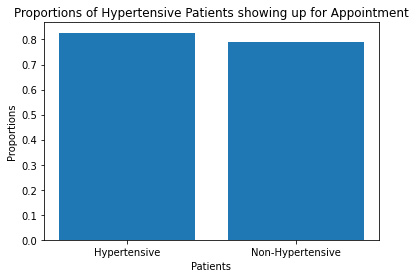

In [223]:
defGraphs(id_1 = 'Hypertensive', id_2 = 'Non-Hypertensive', xLabel = 'Patients', yLabel = 'Proportions',
          xParam = prop_hyp, yParam = prop_No_hyp, 
          graphName = 'Proportions of Hypertensive Patients showing up for Appointment')

From the calculations and graph above, we can see that the proportions of those with hypertension keeping to their appointments is is about 4% more than those without hypertension. This shows that been hypertensive can be considered a factor in determining if a patient will keep to the appointment.

### Appointments based on Diabetes

In [224]:
diab_abs = len(newDF[newDF[('Diabetes')] == 0])
diab_pre = len(newDF[newDF[('Diabetes')] == 1])
diab_abs, diab_pre

(102578, 7943)

In [225]:
diab_abs_per = len(newDF[newDF[('Diabetes')] == 0]) / newDF.Diabetes.shape[0] * 100
diab_pre_per = len(newDF[newDF[('Diabetes')] == 1]) / newDF.Diabetes.shape[0] * 100
diab_abs_per, diab_pre_per

(92.81313053627818, 7.186869463721826)

From above, it can be seen that 102583 (93%) of the patients does not have diabetes while 7943 (7%) are diabetic.

Next we find the relationship between been diabetic and showing up for the appointments by calculating the proportions

In [226]:
newDF.groupby('Diabetes')['NoShow'].value_counts()

Diabetes  NoShow
0         No        81694
          Yes       20884
1         No         6513
          Yes        1430
Name: NoShow, dtype: int64

In [227]:
#Proportion of patients with Diabetes showing up for appointments:
prop_diab = len(newDF.query("Diabetes == 1 & NoShow == 'No'")) / len(newDF[newDF[('Diabetes')] == 1])

prop_No_diab = len(newDF.query("Diabetes == 0 & NoShow == 'No'")) / len(newDF[newDF[('Diabetes')] == 0])
prop_diab, prop_No_diab

(0.8199672667757774, 0.7964085866365107)

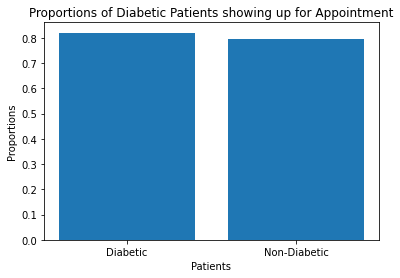

In [228]:
defGraphs(id_1 = 'Diabetic', id_2 = 'Non-Diabetic', xLabel = 'Patients', yLabel = 'Proportions',
          xParam = prop_diab, yParam = prop_No_diab, 
          graphName = 'Proportions of Diabetic Patients showing up for Appointment')

From above, we can note that the proportions of those with diabetes keeping to their appointments is almost the same as those without diabetes. This shows that been diabetic is not really a function of keeping to the appointment

### Appointments based on Alcoholism

In [229]:
alc_abs = len(newDF[newDF[('Alcoholism')] == 0])
alc_pre = len(newDF[newDF[('Alcoholism')] == 1])
alc_abs, alc_pre

(107161, 3360)

In [230]:
alc_abs_per = len(newDF[newDF[('Alcoholism')] == 0]) / newDF.Alcoholism.shape[0] * 100
alc_pre_per = len(newDF[newDF[('Alcoholism')] == 1]) / newDF.Alcoholism.shape[0] * 100
alc_abs_per, alc_pre_per

(96.95985378344388, 3.0401462165561295)

From above, it can be seen that 107166 (97%) of the patients are not alcoholic while 3360 (3%) are alcoholic.

Next we find the relationship between been alcoholic and showing up for the appointments by calculating the proportions

In [231]:
newDF.groupby('Alcoholism')['NoShow'].value_counts()

Alcoholism  NoShow
0           No        85524
            Yes       21637
1           No         2683
            Yes         677
Name: NoShow, dtype: int64

In [232]:
#Proportion of patients with and without Alcoholism showing up for appointments:
prop_alc = len(newDF.query("Alcoholism == 1 & NoShow == 'No'")) / len(newDF[newDF[('Alcoholism')] == 1])
prop_No_alc = len(newDF.query("Alcoholism == 0 & NoShow == 'No'")) / len(newDF[newDF[('Alcoholism')] == 0])
prop_alc, prop_No_alc

(0.7985119047619048, 0.7980888569535559)

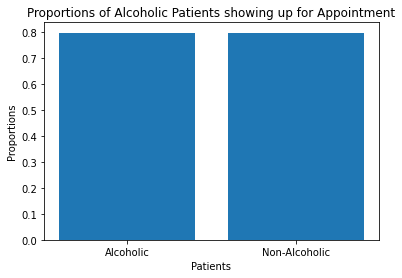

In [233]:
defGraphs(id_1 = 'Alcoholic', id_2 = 'Non-Alcoholic', xLabel = 'Patients', yLabel = 'Proportions',
          xParam = prop_alc, yParam = prop_No_alc, 
          graphName = 'Proportions of Alcoholic Patients showing up for Appointment')

From above, we can see that the proportions of the Alcoholic keeping to their appointments is the same as the non-Alcoholic. This shows that been Alcoholic is not really a function of keeping to the appointment

### Appointments based on Handicap

In [234]:
#Number of patients with or without handicap
hand_abs = len(newDF[newDF[('Handicap')] == 0])
hand_pre = len(newDF[newDF[('Handicap')] != 0])
hand_abs, hand_pre

(108282, 2239)

In [235]:
#Percentage of patients with or without handicap
hand_abs_per = len(newDF[newDF[('Handicap')] == 0]) / newDF.Handicap.shape[0] * 100
hand_pre_per = len(newDF[newDF[('Handicap')] != 0]) / newDF.Handicap.shape[0] * 100
hand_abs_per, hand_pre_per

(97.97414066105084, 2.025859338949159)

From above, it can be seen that 108285 (98%) of the patients are not handicapped while 2241 (2%) are handicapped.

Next we find the relationship between been handicapped and showing up for the appointments by calculating the proportions

In [236]:
newDF.groupby('Handicap')['NoShow'].value_counts()

Handicap  NoShow
0         No        86373
          Yes       21909
1         No         1676
          Yes         364
2         No          146
          Yes          37
3         No           10
          Yes           3
4         No            2
          Yes           1
Name: NoShow, dtype: int64

In [237]:
len(newDF.query("Handicap != 0 & NoShow == 'No'"))

1834

In [238]:
#Proportion of patients with and without Handicap showing up for appointments:
prop_hand = len(newDF.query("Handicap != 0 & NoShow == 'No'")) / len(newDF[newDF[('Handicap')] != 0])

prop_No_hand = len(newDF.query("Handicap == 0 & NoShow == 'No'")) / len(newDF[newDF[('Handicap')] == 0])
prop_hand, prop_No_hand

(0.8191156766413578, 0.7976672023050922)

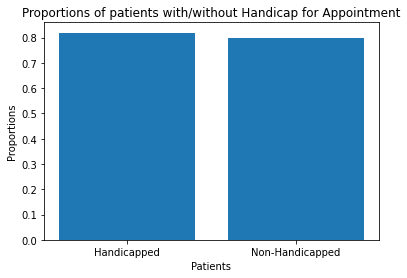

In [239]:
defGraphs(id_1 = 'Handicapped', id_2 = 'Non-Handicapped', xLabel = 'Patients', yLabel = 'Proportions',
          xParam = prop_hand, yParam = prop_No_hand, 
          graphName = 'Proportions of patients with/without Handicap for Appointment')

From above, it can be seen that:

    i. Handicap is classified into 4 groups, each designated with numbers 1 to 4, with 0 indicating those without handicap.
    ii. The proportion of those with handicap and showed up for their appointment is almost same as those without handicap.
    iii. Hence, we can see that been handicap might not be a factor in determining if a patient will keep to his/her appointment.

### Appointments based on Scholarship

Scholarship here is an indication of whether a patient is enrolled in Brasilian Welfare Program

In [240]:
#Number of people with or without scholarship
sch_abs = len(newDF[newDF[('Scholarship')] == 0])
sch_pre = len(newDF[newDF[('Scholarship')] == 1])
sch_abs, sch_pre

(99660, 10861)

In [241]:
#Percentage of people with or without scholarship
sch_abs_per = len(newDF[newDF[('Scholarship')] == 0]) / newDF.Scholarship.shape[0] * 100
sch_pre_per = len(newDF[newDF[('Scholarship')] == 1]) / newDF.Scholarship.shape[0] * 100
sch_abs_per, sch_pre_per

(90.17290831606662, 9.82709168393337)

From above, it can be seen that 99665 (90%) of the patients have no scholarship while 10861 (9.8%) have.

Next we find the relationship between having scholarship and showing up for the appointments by calculating the proportions

In [242]:
newDF.groupby('Scholarship')['NoShow'].value_counts()

Scholarship  NoShow
0            No        79924
             Yes       19736
1            No         8283
             Yes        2578
Name: NoShow, dtype: int64

In [243]:
#Proportion of patients with Scholarship showing up for appointments:
prop_sch = len(newDF.query("Scholarship == 1 & NoShow == 'No'")) / len(newDF[newDF[('Scholarship')] == 1])
prop_No_sch = len(newDF.query("Scholarship == 0 & NoShow == 'No'")) / len(newDF[newDF[('Scholarship')] == 0])
prop_sch, prop_No_sch

(0.7626369579228433, 0.8019666867348987)

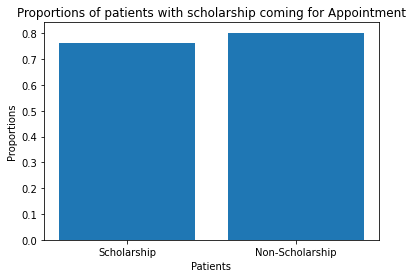

In [244]:
defGraphs(id_1 = 'Scholarship', id_2 = 'Non-Scholarship', xLabel = 'Patients', yLabel = 'Proportions',
          xParam = prop_sch, yParam = prop_No_sch, 
          graphName = 'Proportions of patients with scholarship coming for Appointment')

From above, we can see that the proportions of those with scholarship keeping to their appointments is about 5% less than those without scholarship. Hence the availability of scholarship for the patients can be a factor in determining if a patient will make the appointment.

### Appointments based on SMSReceived

In [245]:
#Number of people that received or did not received
sms_abs = len(newDF[newDF[('SMSReceived')] == 0])
sms_pre = len(newDF[newDF[('SMSReceived')] == 1])
sms_abs, sms_pre

(75039, 35482)

In [246]:
sms_abs_per = len(newDF[newDF[('SMSReceived')] == 0]) / newDF.SMSReceived.shape[0] * 100
sms_pre_per = len(newDF[newDF[('SMSReceived')] == 1]) / newDF.SMSReceived.shape[0] * 100
sms_abs_per, sms_pre_per

(67.89569403099863, 32.104305969001366)

From above, it can be seen that more than 75000 (68%) of the patients did not rerceive SMS while more than 35000 (32%) received.

Next we find the relationship between receiving SMS and showing up for the appointments by calculating the proportions.

In [247]:
newDF.groupby('SMSReceived')['NoShow'].value_counts()

SMSReceived  NoShow
0            No        62509
             Yes       12530
1            No        25698
             Yes        9784
Name: NoShow, dtype: int64

In [248]:
#Proportion of patients the received SMS showing up for appointments:
prop_sms = len(newDF.query("SMSReceived == 1 & NoShow == 'No'")) / len(newDF[newDF[('SMSReceived')] == 1])
prop_No_sms = len(newDF.query("SMSReceived == 0 & NoShow == 'No'")) / len(newDF[newDF[('SMSReceived')] == 0])
prop_sms, prop_No_sms

(0.7242545516036301, 0.833020162848652)

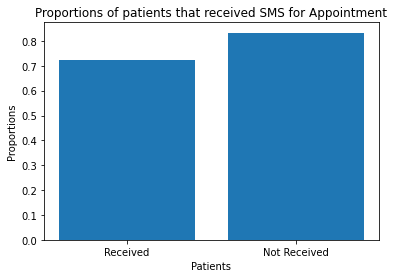

In [249]:
defGraphs(id_1 = 'Received', id_2 = 'Not Received', xLabel = 'Patients', yLabel = 'Proportions',
          xParam = prop_sms, yParam = prop_No_sms, 
          graphName = 'Proportions of patients that received SMS for Appointment')

From above, we can see that the proportions of those that received SMS and made it for the appointment is about than 10% less than those that did not receive SMS. Hence the use of SMS can be a factor in determining if a patient will make the appointment.

### Appointment based on Age

In [250]:
#The individual age of the patients sorted in ascending order
np.sort(newDF.Age.unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

The ages of the patients ranges from 0 to 115

In [251]:
# Count the ages
newDF.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [252]:
#Number of patients that showed/did not show for appointment based on age
newDF.groupby('Age')['NoShow'].value_counts()

Age  NoShow
0    No        2900
     Yes        639
1    No        1858
     Yes        415
2    No        1366
               ... 
99   No           1
100  No           4
102  No           2
115  Yes          3
     No           2
Name: NoShow, Length: 203, dtype: int64

In [253]:
def hGraph(data, xLabel, yLabel, graphName, legName):
    data.hist()
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(graphName)
    plt.legend(legName)
    plt.show()

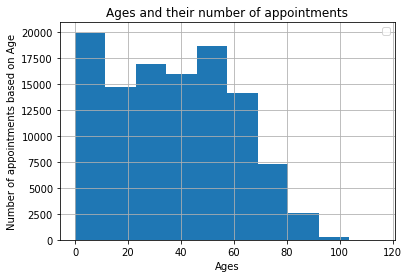

In [254]:
#A graph of the Age distribution
hGraph(newDF.Age, 'Ages', 'Number of appointments based on Age', 'Ages and their number of appointments', '')

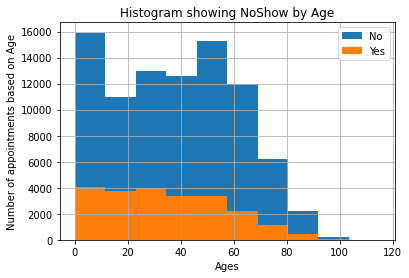

In [255]:
# Plotting the ages based on the people that showed up for the appointments
hGraph(newDF.groupby(['NoShow']).Age, 'Ages', 'Number of appointments based on Age', 
       'Histogram showing NoShow by Age', newDF['NoShow'].unique())

From the graph above, it can be deduced that the proportion of the patients that showed up for the appointments is the same across all the ages based on the total number of patients per age. This can be illustrated further below.

In [256]:
def seaPlot_1(a, b, col_1, col_2, xLabel, yLabel, gTitle):
    plt.figure(figsize = (a, b))
    ax = sns.countplot(x = col_1, hue = col_2)
    plt.xticks(rotation = 90)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(gTitle)
    plt.show()

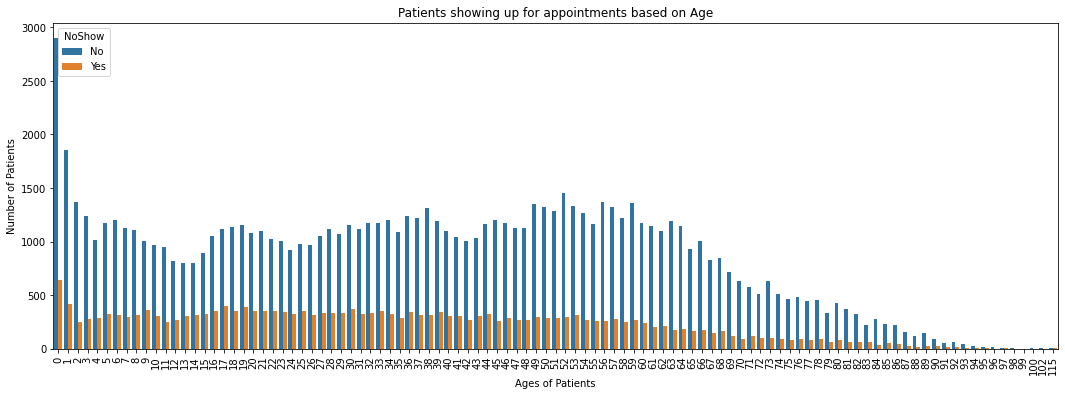

In [257]:
seaPlot_1(18, 6, newDF.Age, newDF.NoShow, 'Ages of Patients', 'Number of Patients', 'Patients showing up for appointments based on Age')

To verify further, we can calculate the proportion of those that showed up based on their age

In [258]:
ageProp = newDF[newDF[("NoShow")] == 'No'].groupby(['Age']).size() / newDF.groupby('Age').size()
ageProp

Age
0      0.819441
1      0.817422
2      0.844252
3      0.816920
4      0.782910
         ...   
98     0.833333
99     1.000000
100    1.000000
102    1.000000
115    0.400000
Length: 103, dtype: float64

In [296]:
def barPlots(a, b, col_1, col_2, xLabel, yLabel, gTitle):
    plt.figure(figsize = (a, b))
    plt.bar(col_1, col_2)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.xticks(rotation = 90)
    plt.title(gTitle)
    plt.show()

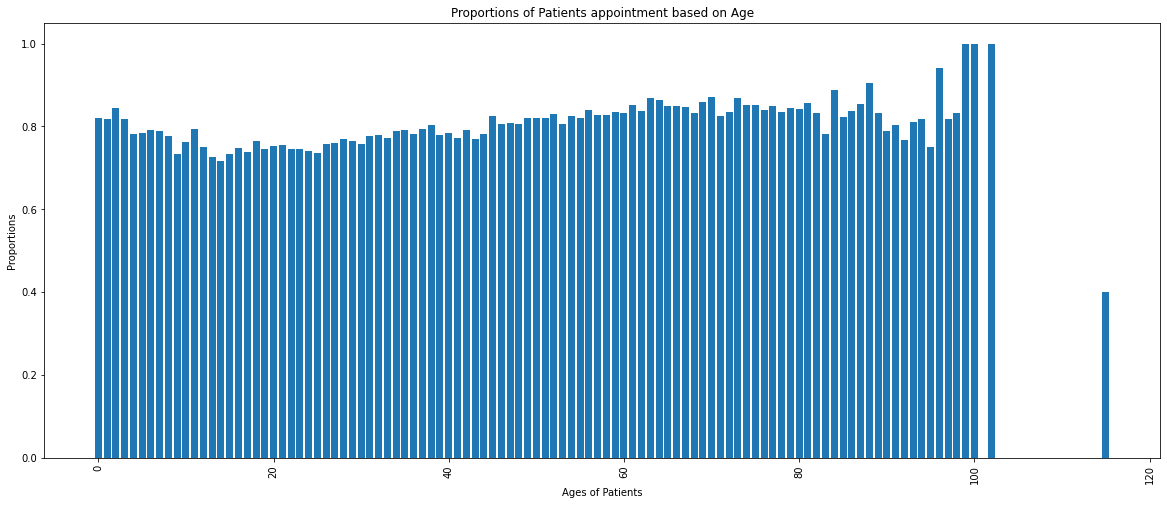

In [297]:
barPlots(20, 8, ageProp.index, ageProp, 'Ages of Patients', 'Proportions', 'Proportions of Patients appointment based on Age')

We can see that the proportion of the patients that made it for their appointments based on their age is between 0.75 and 1.00, except for patient with age 115 whose proportion is 0.4 (2 people showed up for the appointment out of 5). Therefore, we can observe that age is not necessarily a factor of the patients been present for their appointments.

### Appointments based on Neighbourhood

In [261]:
#The various Neighbourhood of the patients
np.sort(newDF.Neighbourhood.unique())

array(['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO',
       'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA',
       'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO',
       'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA',
       'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO',
       'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO',
       'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO',
       'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI',
       'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE',
       'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI',
       'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC',
       'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA',
       'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH',
       'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE',
       'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ',

In [262]:
#Count of the Neighbourhoods
newDF.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [263]:
newDF.groupby('Neighbourhood')['NoShow'].value_counts()

Neighbourhood    NoShow
AEROPORTO        No           7
                 Yes          1
ANDORINHAS       No        1741
                 Yes        521
ANTÔNIO HONÓRIO  No         221
                           ... 
TABUAZEIRO       Yes        572
UNIVERSITÁRIO    No         120
                 Yes         32
VILA RUBIM       No         710
                 Yes        141
Name: NoShow, Length: 160, dtype: int64

A chart of the neighbourhoods based on the number of patients

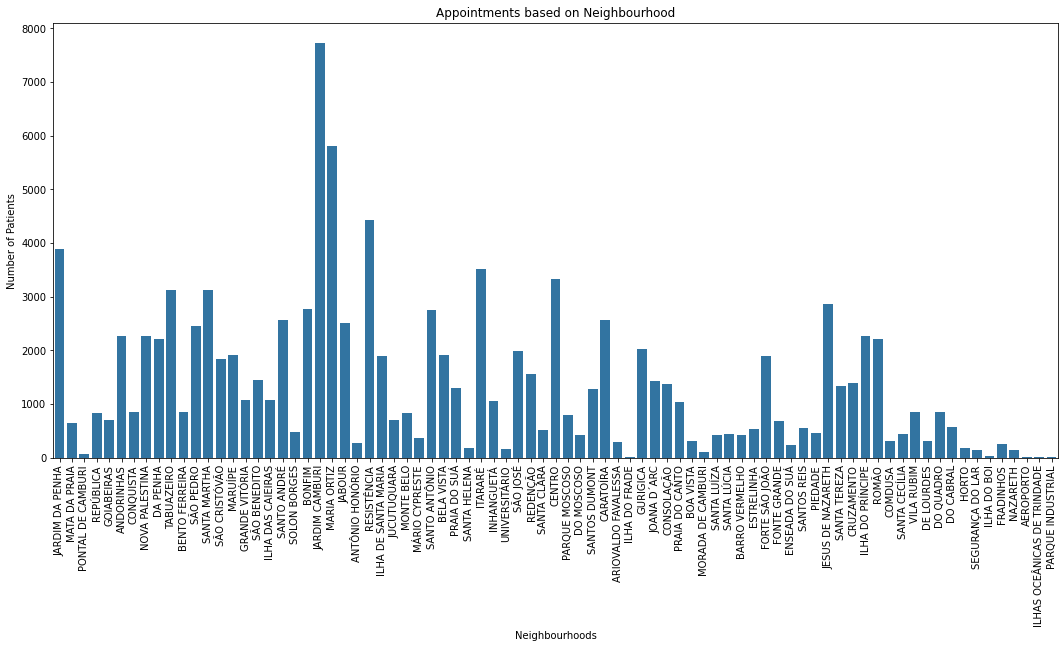

In [265]:
plt.figure(figsize = (18, 8))
plt.xticks(rotation = 90)
baseColor = sns.color_palette()[0]
ax = sns.countplot(x = newDF['Neighbourhood'], color = baseColor)
plt.title('Appointments based on Neighbourhood')
plt.xlabel('Neighbourhoods')
plt.ylabel('Number of Patients')
plt.show()

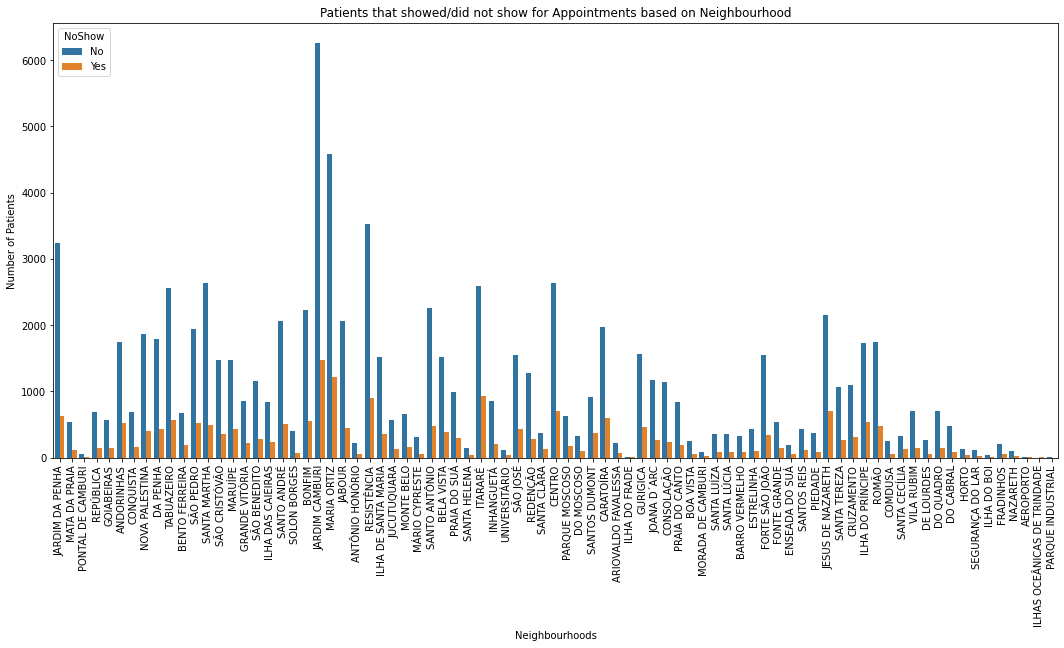

In [266]:
seaPlot_1(18, 8, newDF.Neighbourhood, newDF.NoShow,
         'Neighbourhoods', 'Number of Patients', 'Patients that showed/did not show for Appointments based on Neighbourhood')

From the graph above, it can be seen that the proportion of those that showed up for their appointments across the Neighbourhoods is almost the same based on the total number of patients per neighbourhood.

The same graph plotted below, and in descending order will shed more light

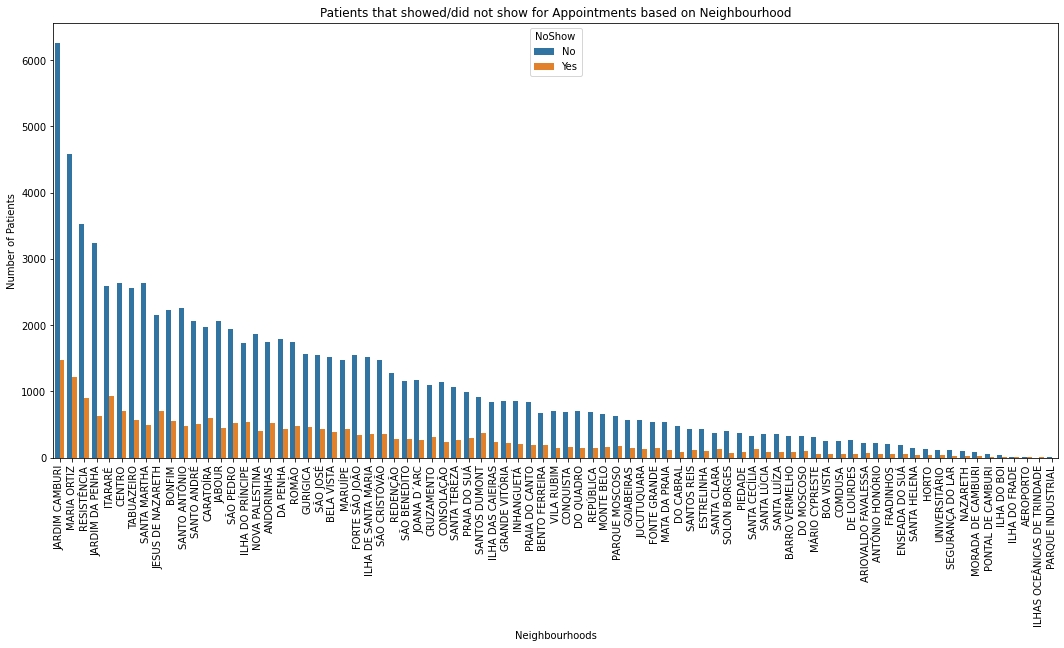

In [267]:
plt.figure(figsize = (18, 8))
plt.xticks(rotation = 90)
ax = sns.countplot(x = newDF['Neighbourhood'], hue = newDF['NoShow'], order = newDF['Neighbourhood'].value_counts().index)
plt.title('Patients that showed/did not show for Appointments based on Neighbourhood')
plt.xlabel('Neighbourhoods')
plt.ylabel('Number of Patients')
plt.show()

We can also go further by calculating the proportion based on the Neighbourhood

In [268]:
neiProp = df[df[("NoShow")] == 'No'].groupby(['Neighbourhood']).size() / df.groupby('Neighbourhood').size()
neiProp

Neighbourhood
AEROPORTO              0.875000
ANDORINHAS             0.769673
ANTÔNIO HONÓRIO        0.815498
ARIOVALDO FAVALESSA    0.780142
BARRO VERMELHO         0.784870
                         ...   
SÃO JOSÉ               0.783510
SÃO PEDRO              0.789624
TABUAZEIRO             0.817050
UNIVERSITÁRIO          0.789474
VILA RUBIM             0.834313
Length: 81, dtype: float64

In [269]:
neiProp.min(), neiProp.max()

(0.7108150470219435, 1.0)

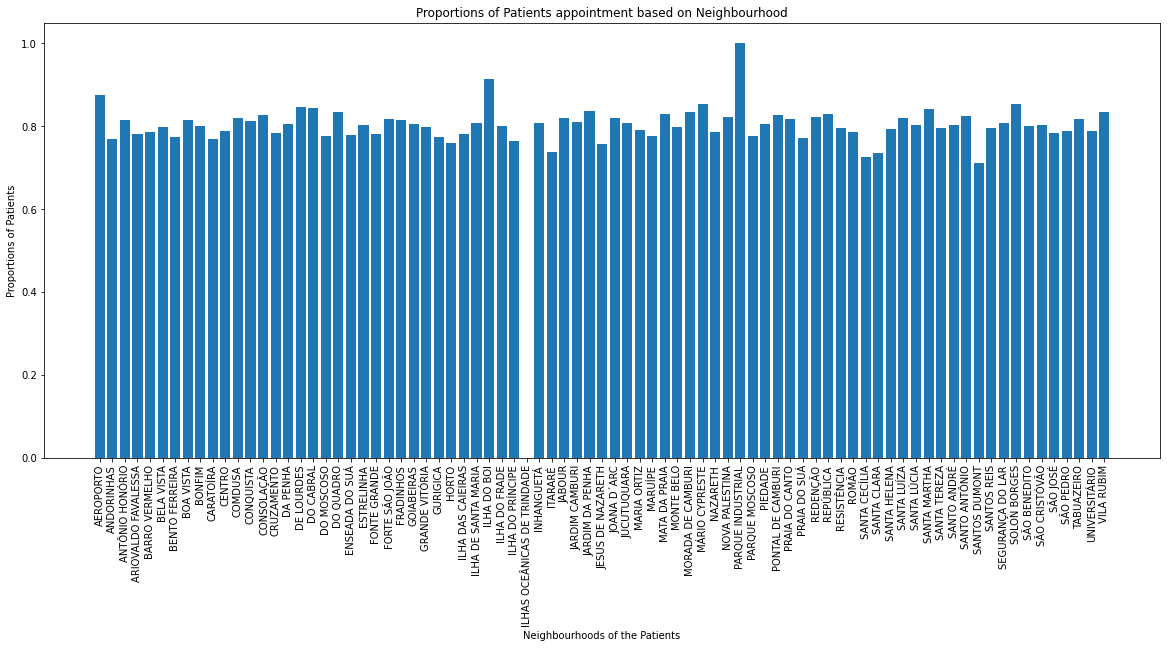

In [270]:
barPlots(20, 8, neiProp.index, neiProp, 90, 'Neighbourhoods of the Patients',
         'Proportions of Patients', 'Proportions of Patients appointment based on Neighbourhood')

We can see that the proportion of the different Neighbourhoods that made it for the appointment is almost similar, though with one or two exceptions, and one neighbourhood not making it to the appointment. Therefore, from above, we can observe that Neighbourhoods are not a factor for determining if a patient will make it for the appointment.

### Appointments based on waiting period

In [271]:
#The waiting days betweeen scheduling and appointment
np.sort(newDF.NumDays.unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98, 101, 102, 103, 104, 105,
       107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126,
       127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179])

In [272]:
# Count the waiting days
newDF.NumDays.value_counts()

0      38562
2       6725
4       5290
1       5213
7       4906
       ...  
101        1
132        1
151        1
146        1
127        1
Name: NumDays, Length: 129, dtype: int64

In [273]:
#Number of patients that showed/did not show for appointment based on number of waiting days
newDF.groupby('NumDays')['NoShow'].value_counts()

NumDays  NoShow
0        No        36770
         Yes        1792
1        No         4100
         Yes        1113
2        No         5123
                   ...  
169      Yes           1
176      No           10
         Yes           6
179      No            8
         Yes           2
Name: NoShow, Length: 235, dtype: int64

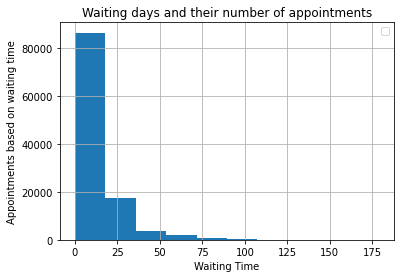

In [274]:
# Plotting the waiting time based on the people that showed up for the appointments
hGraph(newDF.NumDays, 'Waiting Time', 'Appointments based on waiting time', 
       'Waiting days and their number of appointments', '')

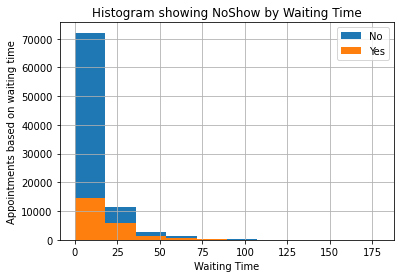

In [275]:
# Plotting the waiting time based on the people that showed up for the appointments
hGraph(newDF.groupby(['NoShow']).NumDays, 'Waiting Time', 'Appointments based on waiting time', 
       'Histogram showing NoShow by Waiting Time', df.NoShow.unique())

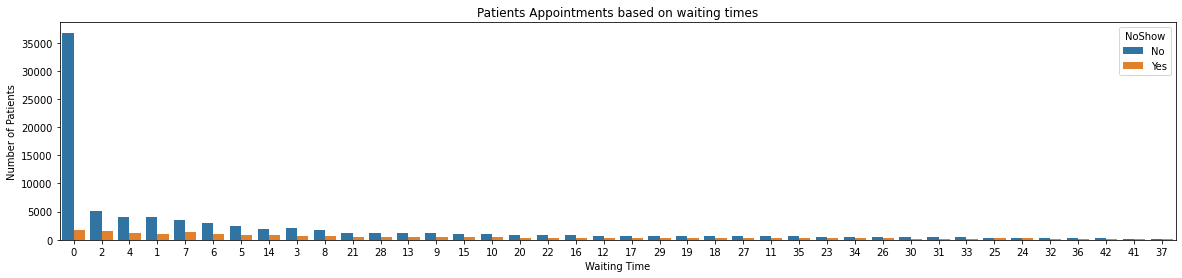

In [276]:
plt.figure(figsize = (20, 4))
ax = sns.countplot(x = newDF['NumDays'], hue = newDF['NoShow'], order = newDF.NumDays.value_counts().iloc[:40].index)
plt.ylabel('Number of Patients')
plt.xlabel('Waiting Time')
plt.title("Patients Appointments based on waiting times")
plt.show()

The plot above shows the waiting time in descending order. Only the first 40 data points were shown due to space.

We can calculate the proportion of those that showed up based on the number of waiting days to gain more insight

In [277]:
numProp = newDF[newDF[("NoShow")] == 'No'].groupby(['NumDays']).size() / newDF.groupby('NumDays').size()
numProp

NumDays
0      0.953529
1      0.786495
2      0.761784
3      0.764706
4      0.767297
         ...   
155    0.400000
162    0.818182
169    0.875000
176    0.625000
179    0.800000
Length: 129, dtype: float64

In [290]:
numProp.min(), numProp.max()

(0.25, 1.0)

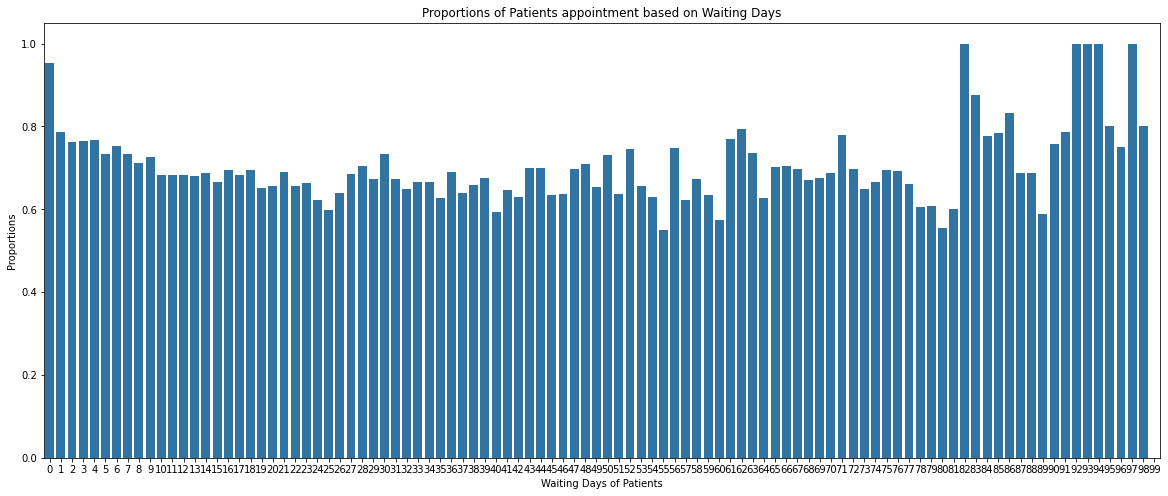

In [279]:
plt.figure(figsize = (20, 8))
ax = sns.barplot(x = numProp.index, y = numProp, order=newDF.NumDays.iloc[:100].index, color = baseColor)
plt.title("Proportions of Patients appointment based on Waiting Days")
plt.xlabel('Waiting Days of Patients')
plt.ylabel('Proportions')
plt.show()

We can see that the proportion of the patients that made it for their appointments based on the waiting time differs. Therefore, we can observe that the waiting time is a considerable factor of the patients been present for their appointments.

### Appointments based on Days of the Week

In [280]:
#The Days of the weeks for the Appointments
newDF.AppWeekDay.unique()

array(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday'],
      dtype=object)

In [281]:
# Number of Appointments per day of the week
newDF.AppWeekDay.value_counts()

Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: AppWeekDay, dtype: int64

In [282]:
#Number of those that showed/did not show for appointment based on day of the week.
newDF.groupby('AppWeekDay')['NoShow'].value_counts()

AppWeekDay  NoShow
Friday      No        14982
            Yes        4037
Monday      No        18024
            Yes        4689
Saturday    No           30
            Yes           9
Thursday    No        13909
            Yes        3337
Tuesday     No        20488
            Yes        5150
Wednesday   No        20774
            Yes        5092
Name: NoShow, dtype: int64

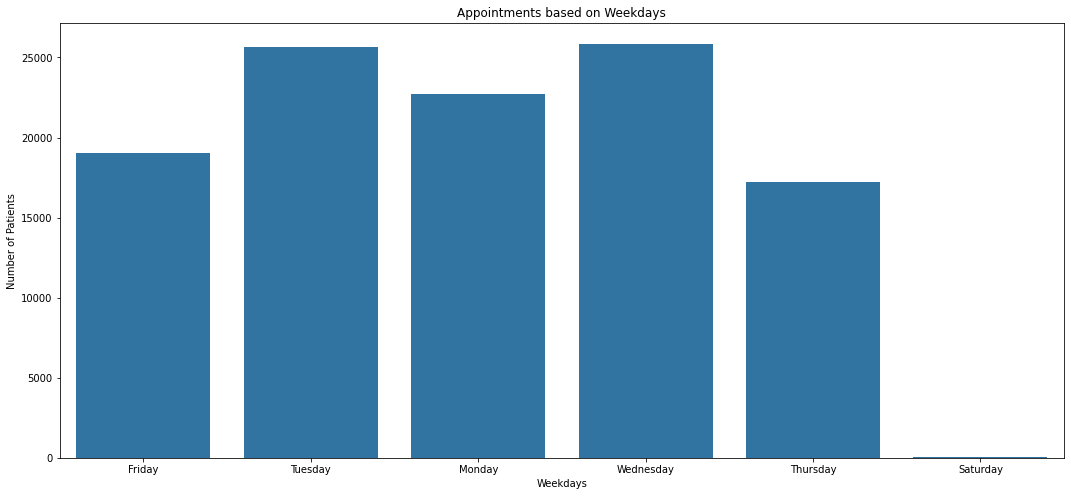

In [289]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(x = newDF['AppWeekDay'], color = baseColor)
plt.title('Appointments based on Weekdays')
plt.xlabel('Weekdays')
plt.ylabel('Number of Patients')
plt.show()

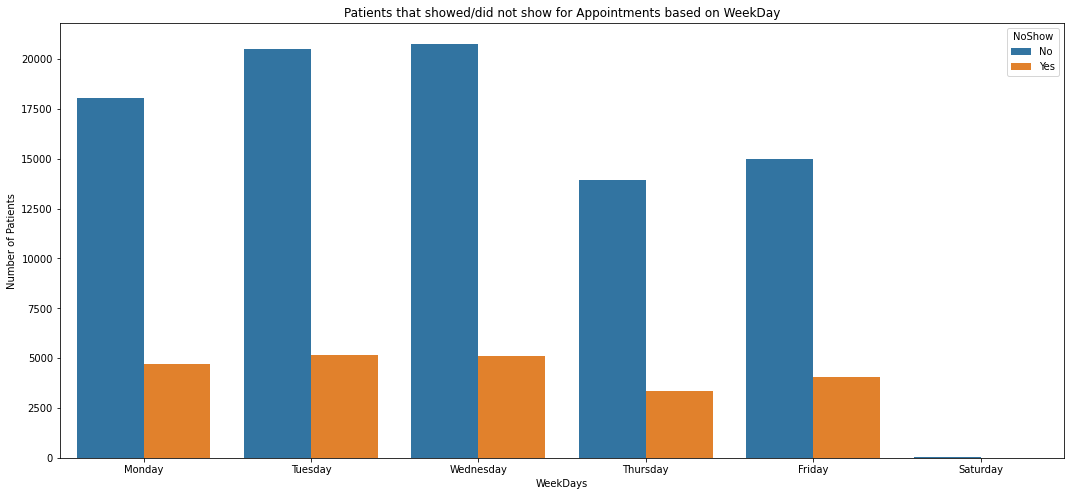

In [284]:
daysOfWeeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize = (18, 8))
ax = sns.countplot(x = newDF['AppWeekDay'], hue = newDF['NoShow'], order = daysOfWeeks)
plt.title('Patients that showed/did not show for Appointments based on WeekDay')
plt.xlabel('WeekDays')
plt.ylabel('Number of Patients')
plt.show()

Using the above graph, it can be seen that the proportion of those that showed up for their appointments based on the days of the Week is almost the same. This can be shown further thus:

In [285]:
daysProp = newDF[newDF[("NoShow")] == 'No'].groupby(['AppWeekDay']).size() / newDF.groupby('AppWeekDay').size()
daysProp

AppWeekDay
Friday       0.787739
Monday       0.793554
Saturday     0.769231
Thursday     0.806506
Tuesday      0.799126
Wednesday    0.803139
dtype: float64

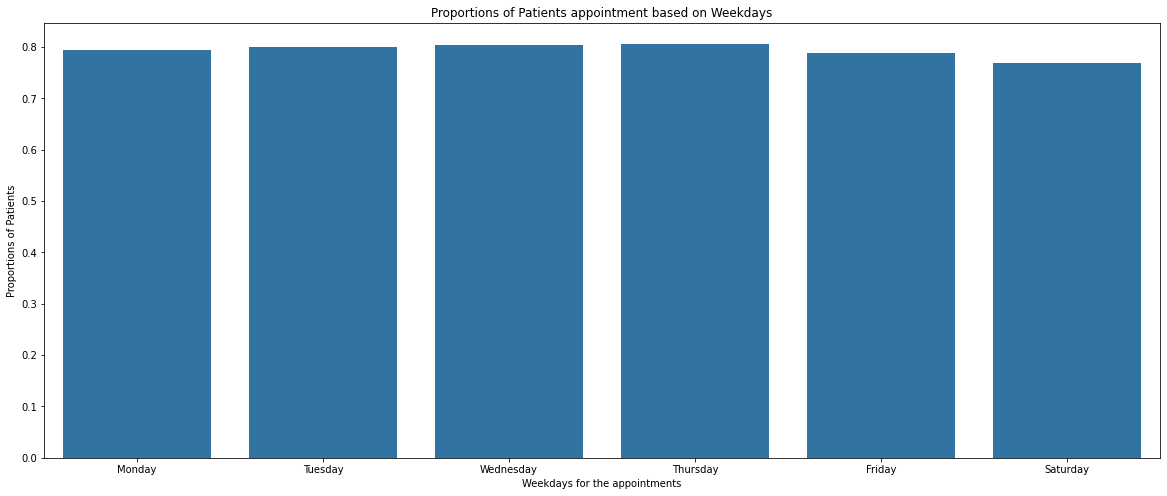

In [286]:
plt.figure(figsize = (20, 8))
ax = sns.barplot(x = daysProp.index, y = daysProp, order = daysOfWeeks, color = baseColor)
plt.xlabel('Weekdays for the appointments')
plt.ylabel('Proportions of Patients')
plt.title('Proportions of Patients appointment based on Weekdays')
plt.show()

From the graph above, we can see that for appointments made between Monday to Saturday, the proportion of those that showed up were almost the same. So, the days of the week might not be a good factor in predicting if a patient will make the appointment.

### Conclusion
Based on the analysis carried above, we can see that in determining the important factors that can help in predicting if a patient will show up for their scheduled appointment, factors such as Gender, Diabetes, Alcoholism, Handicap, Age and Neighbourhood may not be good fit, while Hypertension, SMS, Scholarship and Waiting times can be used.

### Limitations
    i. the distance from the neighbourhoods to the hospital was not given. This would have shed more light on the effect of Neighbourhood in predicting if a patient will make it for the appointment or not.
    ii. The presence of invalid column values such as negative age and negative waiting times.
    iii. The manner of the data collection was not explained. This could have have given more insight and can also help to explain the second limitation mention above.
    iv. The appointment times for each of the patients was not included. Such information would have been of great value in making the analysis.

#### References
i. [Kaggle](https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&source=editors&ust=1612999158076000&usg=AOvVaw0s7Xdg12uAs7KnQAjYTXxo)<br />
ii. [Convert month number to name in python pandas df](https://stackoverflow.com/questions/51232224/convert-month-number-to-name-in-python-pandas-df) <br />
iii. [Get Day from date in Pandas – Python](https://www.geeksforgeeks.org/get-day-from-date-in-pandas-python/)<br />
iv. [pandas.DataFrame.query](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html)<br />
v. [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
